In [1]:
import os
os.chdir('../')
from vec_SA import VecMoran
import numpy as np
from pysal.weights.Distance import DistanceBand
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Demonstrating the vector-based Moran's I statistic for spatial autocorrelation and the associated proposed randomization techniques for generating psuedo p-values

##### - Technique A: Randomly select one vector among the N observed vectors and assign its origin (destination) to the origin (destination) point of another observed vector. This is equivlanet to geometrically translating both the original origin and the original destination by the coordinates of the new origin (destination) point, which preserves the direction and magnitude of the original vector. Using this technique it is possible to generate new vectors that are outside the bounding box of the original set of vectors, thererby violating any potential study area boundaries.
##### - Technique B: For each vector among the N observed vectors, reassign its origin (destination) point to the destination (origin) from another  randomly selected vector from the N observed vectors. This does does not preserve distance or magnitude, though it does ensure that all new vectors remain within the bounding box of the of the original vectors

### Generate 1000 random datasets of 50 vectors, then calculate the vector Moran's I  from the destination perspective (VMD) and a psuedo p value  (based on 99 permutations) using randomization technique A and randomization technique B for each of the 1000 datasets. 

In [237]:
dest_A_rand_I = []
dest_B_rand_I = []
dest_A_rand_p = []
dest_B_rand_p = []
for i in range(1000):
    phi = np.random.uniform(0,np.pi*2, 50).reshape((-1,1))
    num = np.arange(0,50).reshape((-1,1))
    OX = np.random.randint(0,500, 50).reshape((-1,1))
    OY = np.random.randint(0,500, 50).reshape((-1,1))
    DX = np.cos(phi)*(np.random.randint(0,500, 50)).reshape((-1,1))
    DY = np.sin(phi)*np.random.randint(0,500, 50).reshape((-1,1))

    vecs = np.hstack([num, OX, OY, DX, DY])
    dests = vecs[:, 3:5]
    wd = DistanceBand(dests, threshold=9999, alpha=-1.5, binary=False)

    vmd = VecMoran(vecs, wd, focus='destination', rand='A', permutations=999)
    dest_A_rand_I.append(vmd.I)
    dest_A_rand_p.append(vmd.p_z_sim)
    vmd = VecMoran(vecs, wd, focus='destination', rand='B', permutations=999)
    dest_B_rand_I.append(vmd.I)
    dest_B_rand_p.append(vmd.p_z_sim)




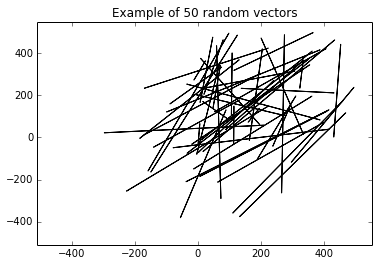

In [238]:
X,Y,U,V = zip(*vecs[:,1:])
plt.subplot(111)
for x in range(0,len(vecs[:,1])):
    plt.arrow(X[x],  #x1
              Y[x],  # y1
              U[x]-X[x], # x2 - x1
              V[x]-Y[x], # y2 - y1
              fc="k", ec="k", head_width=0.05, head_length=0.1)
plt.xlim([-510,550])
plt.ylim([-510,550])
plt.title('Example of 50 random vectors')
plt.show()

### Generate 1000 random datasets of 50 vectors with constrained origins (to induce positive spatial autocorrrlation), then calculate the vector Moran's I  from the destination perspective (VMD) and a psuedo p value  (based on 99 permutations) using randomization technique A and randomization technique B for each of the 1000 datasets. 

In [239]:

dest_A_cons_I = []
dest_B_cons_I = []
dest_A_cons_p = []
dest_B_cons_p = []
for i in range(1000):
    phi = np.random.uniform(0,np.pi*2, 50).reshape((-1,1))
    num = np.arange(0,50).reshape((-1,1))
    OX = np.random.randint(450,500, 50).reshape((-1,1))
    OY = np.random.randint(450,500, 50).reshape((-1,1))
    DX = np.cos(phi)*(np.random.randint(450,500, 50)).reshape((-1,1))
    DY = np.sin(phi)*np.random.randint(450,500, 50).reshape((-1,1))

    vecs = np.hstack([num, OX, OY, DX, DY])
    dests = vecs[:, 3:5]
    wd = DistanceBand(dests, threshold=9999, alpha=-1.5, binary=False)

    vmd = VecMoran(vecs, wd, focus='destination', rand='A', permutations=999)
    dest_A_cons_I.append(vmd.I)
    dest_A_cons_p.append(vmd.p_z_sim)
    vmd = VecMoran(vecs, wd, focus='destination', rand='B', permutations=999)
    dest_B_cons_I.append(vmd.I)
    dest_B_cons_p.append(vmd.p_z_sim)



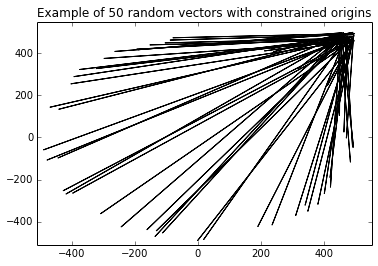

In [240]:
X,Y,U,V = zip(*vecs[:,1:])
plt.subplot(111)
for x in range(0,len(vecs[:,1])):
    plt.arrow(X[x],  #x1
              Y[x],  # y1
              U[x]-X[x], # x2 - x1
              V[x]-Y[x], # y2 - y1
              fc="k", ec="k", head_width=0.05, head_length=0.1)
plt.xlim([-510,550])
plt.ylim([-510,550])
plt.title('Example of 50 random vectors with constrained origins')
plt.show()

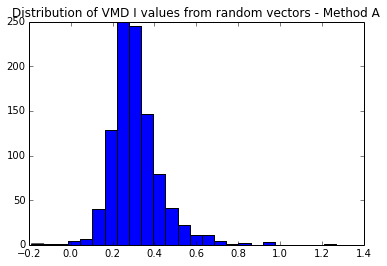

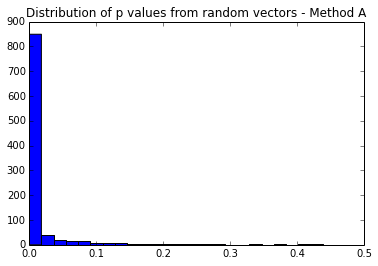

In [247]:
#Method A random
plt.hist(dest_A_rand_I, bins = 25)
plt.title('Distribution of VMD I values from random vectors - Method A')
plt.show()
plt.hist(dest_A_rand_p, bins = 25)
plt.title('Distribution of p values from random vectors - Method A')
plt.show()

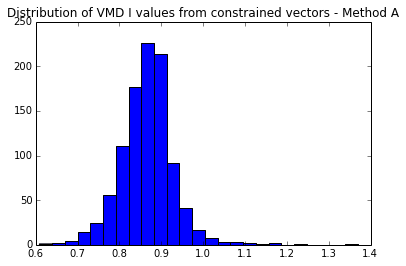

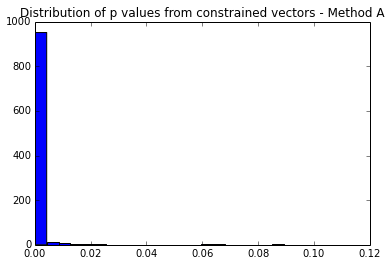

In [248]:
#Method A constricted
plt.hist(dest_A_cons_I, bins=25)
plt.title('Distribution of VMD I values from constrained vectors - Method A')
plt.show()
plt.hist(dest_A_cons_p, bins=25)
plt.title('Distribution of p values from constrained vectors - Method A')
plt.show()

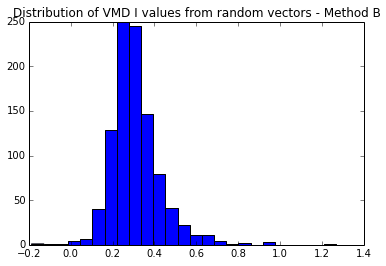

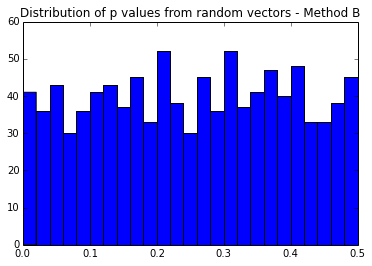

In [249]:
#Method B random
plt.hist(dest_B_rand_I, bins=25)
plt.title('Distribution of VMD I values from random vectors - Method B')
plt.show()
plt.hist(dest_B_rand_p, bins=25)
plt.title('Distribution of p values from random vectors - Method B')
plt.show()

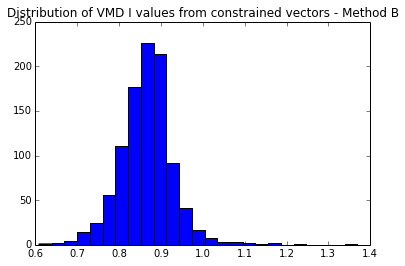

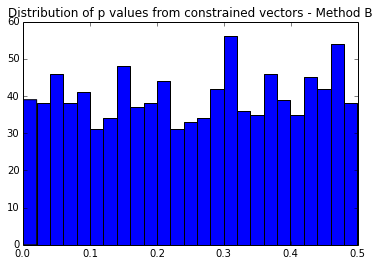

In [250]:
#Method B constricted
plt.hist(dest_B_cons_I, bins=25)
plt.title('Distribution of VMD I values from constrained vectors - Method B')
plt.show()
plt.hist(dest_B_cons_p, bins=25)
plt.title('Distribution of p values from constrained vectors - Method B')
plt.show()

In [245]:
print 'a'

a
